# Cairo, Reproducing experimental data

In this script, I will build a 5x5 plaquette ice in order to have the same structure as in experimemtal realizations. I will leave the boundaries free to fully reproduce experimental conditions. The idea is to analyze the data with poor statistics and high statistics in order to observe if something changes. Also with this simulations we pretend to elucidate if radial polarization and charge accumulation at the boundaries is generating the end of the inverse charge transfer effect observed in bigger systems. 

In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg
from string import Template

%load_ext autoreload
%autoreload 2

In [3]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-15.2"

In [28]:
directions = np.array([

#[0.0,19.5458,0.0],
#[16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,0.0],
#[16.927159337289883,-9.772899999999998,0.0],
#[16.927159337289883,9.772899999999998,-0.0],
#[19.5458,0.0,0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[-9.772900000000002,16.92715933728988,0.0],
#[-19.5458,-0.0,-0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
[0.0,19.5458,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,-0.0],
#[-0.0,-19.5458,-0.0],
#[16.927159337289883,9.772899999999998,0.0], #5
#[16.927159337289883,-9.772899999999998,-0.0],
#[16.927159337289883,-9.772899999999998,0.0],
#[16.927159337289883,9.772899999999998,-0.0],
#[19.5458,0.0,0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-0.0,-19.5458,-0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
#[0.0,19.5458,0.0],
#[16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,0.0],
#[16.927159337289883,-9.772899999999998,0.0],
#[-16.927159337289883,-9.772899999999998,0.0],
#[19.5458,0.0,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0], #10
#[9.772900000000002,16.92715933728988,0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
[19.5458,0.0,0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
#[0.0,19.5458,0.0],
#[16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,-0.0],
#[16.927159337289883,9.772899999999998,-0.0],
#[-19.5458,-0.0,-0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
[19.5458,0.0,0.0],
[-9.772900000000002,-16.92715933728988,-0.0], #15
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[0.0,19.5458,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
#[-0.0,-19.5458,-0.0],
#[-16.927159337289883,-9.772899999999998,-0.0],
#[-16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,-0.0],
#[16.927159337289883,9.772899999999998,-0.0],
[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
#[19.5458,0.0,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[-9.772900000000002,16.92715933728988,0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0], #20
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,-0.0],
[-19.5458,-0.0,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-0.0,-19.5458,-0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
[0.0,19.5458,0.0],
[-16.927159337289883,-9.772899999999998,-0.0], #25
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,-0.0],
[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
[-0.0,-19.5458,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,-0.0],
[19.5458,0.0,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0], #30
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[19.5458,0.0,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[0.0,19.5458,0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,-0.0],
#[-0.0,-19.5458,-0.0],
#[16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,0.0],
#[-16.927159337289883,9.772899999999998,-0.0],
#[-16.927159337289883,-9.772899999999998,0.0],
[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
#[19.5458,0.0,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,-16.92715933728988,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
[-0.0,-19.5458,-0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,-0.0],
[0.0,19.5458,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[19.5458,0.0,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,-0.0],
[0.0,19.5458,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,-0.0],
[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[19.5458,0.0,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
[0.0,19.5458,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[-19.5458,-0.0,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[0.0,19.5458,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,-0.0],
#[0.0,19.5458,0.0],
#[-16.927159337289883,-9.772899999999998,-0.0],
#[16.927159337289883,-9.772899999999998,-0.0],
#[16.927159337289883,-9.772899999999998,0.0],
#[-16.927159337289883,-9.772899999999998,0.0],
[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],

#[-19.5458,-0.0,-0.0],
#[9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,16.92715933728988,0.0],
#[-9.772900000000002,-16.92715933728988,-0.0],
#[-9.772900000000002,16.92715933728988,0.0],

[0.0,19.5458,0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],

[-0.0,-19.5458,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,0.0],

[-19.5458,-0.0,-0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],

[-19.5458,-0.0,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],

[-0.0,-19.5458,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,-9.772899999999998,0.0],

[0.0,19.5458,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,-0.0],

[19.5458,0.0,0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],

[19.5458,0.0,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,-16.92715933728988,-0.0],

[0.0,19.5458,0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,-0.0],

[-0.0,-19.5458,-0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[-16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,9.772899999999998,-0.0],
[16.927159337289883,9.772899999999998,-0.0],

[19.5458,0.0,0.0],
[-9.772900000000002,16.92715933728988,0.0],
[9.772900000000002,16.92715933728988,0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],

[-19.5458,-0.0,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,-16.92715933728988,-0.0],
[-9.772900000000002,16.92715933728988,0.0],

[0.0,19.5458,0.0],
[-16.927159337289883,9.772899999999998,0.0],
[16.927159337289883,9.772899999999998,0.0],
[-16.927159337289883,-9.772899999999998,-0.0],
[16.927159337289883,-9.772899999999998,0.0]])*ureg.um

In [29]:
centers = np.array([

#[0.0 0.0 0.0] ,
#[10.865524559326222 16.046113529213482 0.0] ,
#[-10.865524559326222 16.046113529213482 0.0] ,
#[10.865524559326222 -16.046113529213482 0.0] ,
#[-10.865524559326222 -16.046113529213482 0.0] ,

    #[46.35198129208714 0.0 0.0] ,
#[30.305867762873657 10.865524559326222 0.0] ,
#[30.305867762873657 -10.865524559326222 0.0] ,
#[62.398094821300624 10.865524559326222 0.0] ,
#[62.398094821300624 -10.865524559326222 0.0] ,

    #[0.0 -46.35198129208714 0.0] ,
#[16.046113529213482 -35.48645673276092 0.0] ,
#[-16.046113529213486 -35.48645673276092 0.0] ,
#[-16.046113529213482 -57.217505851413364 0.0] ,
#[16.046113529213486 -57.217505851413364 0.0] ,

[46.35198129208714, -46.35198129208714, 0.0] ,
[35.48645673276092, -30.305867762873657, 0.0] ,
[57.217505851413364, -30.305867762873657, 0.0] ,
[35.48645673276092, -62.398094821300624 ,0.0] ,
[57.217505851413364, -62.398094821300624 ,0.0] ,

    #[92.70396258417428 0.0 0.0] ,
#[103.5694871435005 16.046113529213482 0.0] ,  # 5
#[81.83843802484806 16.046113529213482 0.0] ,
#[103.5694871435005 -16.046113529213482 0.0] ,
#[81.83843802484806 -16.046113529213482 0.0] ,

    #[139.0559438762614 0.0 0.0] ,              # 6
#[123.00983034704794 10.865524559326222 0.0] ,
#[123.00983034704794 -10.865524559326222 0.0] ,
#[155.1020574054749 10.865524559326222 0.0] ,
#[155.1020574054749 -10.865524559326222 0.0] ,

[92.70396258417428, -46.35198129208714, 0.0] ,
[108.75007611338776, -35.48645673276092, 0.0] ,
[76.65784905496079 ,-35.48645673276092 ,0.0] ,
[76.65784905496079 ,-57.217505851413364, 0.0] ,
[108.75007611338776, -57.217505851413364, 0.0] ,

[139.0559438762614, -46.35198129208714 ,0.0] ,
[128.1904193169352, -30.305867762873657, 0.0] ,
[149.92146843558766, -30.305867762873657, 0.0] ,
[128.1904193169352, -62.398094821300624 ,0.0] ,
[149.92146843558766, -62.398094821300624, 0.0] ,

    #[185.40792516834856 0.0 0.0] ,
#[196.27344972767477 16.046113529213482 0.0] ,
#[174.54240060902234 16.046113529213482 0.0] ,
#[196.27344972767477 -16.046113529213482 0.0] ,
#[174.54240060902234 -16.046113529213482 0.0] ,

    #[231.7599064604357 0.0 0.0] ,
#[215.7137929312222 10.865524559326222 0.0] ,  #10
#[215.7137929312222 -10.865524559326222 0.0] ,
#[247.80601998964917 10.865524559326222 0.0] ,
#[247.80601998964917 -10.865524559326222 0.0] ,

[185.40792516834856, -46.35198129208714, 0.0] ,
[201.45403869756203, -35.48645673276092, 0.0] ,
[169.36181163913506, -35.48645673276092, 0.0] ,
[169.36181163913508, -57.217505851413364, 0.0] ,
[201.45403869756205, -57.217505851413364, 0.0] ,

[231.7599064604357, -46.35198129208714, 0.0] ,
[220.89438190110948, -30.305867762873657, 0.0] ,
[242.62543101976192, -30.305867762873657, 0.0] ,
[220.89438190110948, -62.398094821300624, 0.0] ,
[242.62543101976192, -62.398094821300624, 0.0] ,

#[278.1118877525228 0.0 0.0] ,
#[288.97741231184904 16.046113529213482 0.0] ,
#[267.2463631931966 16.046113529213482 0.0] ,
#[288.97741231184904 -16.046113529213482 0.0] ,
#[267.2463631931966 -16.046113529213482 0.0] ,

    #[324.46386904460996 0.0 0.0] ,
#[308.4177555153965 10.865524559326222 0.0] ,
#[308.4177555153965 -10.865524559326222 0.0] ,
#[340.50998257382344 10.865524559326222 0.0] ,
#[340.50998257382344 -10.865524559326222 0.0] ,

[278.1118877525228, -46.35198129208714, 0.0] ,   # 15
[294.1580012817363, -35.48645673276092, 0.0] ,
[262.06577422330935, -35.48645673276092, 0.0] ,
[262.06577422330935, -57.217505851413364, 0.0] ,
[294.1580012817363 ,-57.217505851413364, 0.0] ,

[324.46386904460996, -46.35198129208714, 0.0] ,
[313.59834448528375, -30.305867762873657, 0.0] ,
[335.3293936039362, -30.305867762873657, 0.0] ,
[313.59834448528375, -62.398094821300624, 0.0] ,
[335.3293936039362, -62.398094821300624, 0.0] ,

#[0.0 -92.70396258417428 0.0] ,
#[10.865524559326222 -76.65784905496079 0.0] ,
#[-10.865524559326222 -76.65784905496079 0.0] ,
#[10.865524559326222 -108.75007611338776 0.0] ,
#[-10.865524559326222 -108.75007611338776 0.0] ,

[46.35198129208714, -92.70396258417428, 0.0] ,
[30.305867762873657, -81.83843802484806, 0.0] ,
[30.305867762873657, -103.5694871435005, 0.0] ,
[62.398094821300624, -81.83843802484806, 0.0] ,
[62.398094821300624, -103.5694871435005, 0.0] ,

    #[0.0 -139.0559438762614 0.0] ,
#[16.046113529213482 -128.1904193169352 0.0] ,
#[-16.046113529213486 -128.1904193169352 0.0] ,
#[-16.046113529213482 -149.92146843558766 0.0] ,
#[16.046113529213486 -149.92146843558766 0.0] ,

[46.35198129208714, -139.0559438762614, 0.0] , #20
[35.48645673276092, -123.00983034704794, 0.0] ,
[57.217505851413364, -123.00983034704794, 0.0] ,
[35.48645673276092, -155.1020574054749, 0.0] ,
[57.217505851413364, -155.1020574054749, 0.0] ,

[92.70396258417428, -92.70396258417428, 0.0] ,
[103.5694871435005, -76.65784905496079, 0.0] ,
[81.83843802484806, -76.65784905496079, 0.0] ,
[103.5694871435005, -108.75007611338776, 0.0] ,
[81.83843802484806, -108.75007611338776, 0.0] ,

[139.0559438762614, -92.70396258417428, 0.0] ,
[123.00983034704794, -81.83843802484806, 0.0] ,
[123.00983034704794, -103.5694871435005, 0.0] ,
[155.1020574054749, -81.83843802484806, 0.0] ,
[155.1020574054749, -103.5694871435005, 0.0] ,

[92.70396258417428, -139.0559438762614, 0.0] ,
[108.75007611338776, -128.1904193169352, 0.0] ,
[76.65784905496079, -128.1904193169352, 0.0] ,
[76.65784905496079, -149.92146843558766, 0.0] ,
[108.75007611338776, -149.92146843558766, 0.0] ,

[139.0559438762614, -139.0559438762614, 0.0] ,
[128.1904193169352, -123.00983034704794, 0.0] ,
[149.92146843558766, -123.00983034704794, 0.0] ,
[128.1904193169352, -155.1020574054749, 0.0] ,
[149.92146843558766, -155.1020574054749, 0.0] ,

[185.40792516834856, -92.70396258417428, 0.0] ,  #25
[196.27344972767477, -76.65784905496079, 0.0] ,
[174.54240060902234, -76.65784905496079, 0.0] ,
[196.27344972767477, -108.75007611338776, 0.0] ,
[174.54240060902234, -108.75007611338776, 0.0] ,

[231.7599064604357, -92.70396258417428, 0.0] ,
[215.7137929312222, -81.83843802484806, 0.0] ,
[215.7137929312222, -103.5694871435005, 0.0] ,
[247.80601998964917, -81.83843802484806, 0.0] ,
[247.80601998964917, -103.5694871435005, 0.0] ,

[185.40792516834856, -139.0559438762614, 0.0] ,
[201.45403869756203, -128.1904193169352, 0.0] ,
[169.36181163913506, -128.1904193169352, 0.0] ,
[169.36181163913508, -149.92146843558766, 0.0] ,
[201.45403869756205, -149.92146843558766, 0.0] ,

[231.7599064604357, -139.0559438762614, 0.0] ,
[220.89438190110948, -123.00983034704794, 0.0] ,
[242.62543101976192, -123.00983034704794, 0.0] ,
[220.89438190110948, -155.1020574054749, 0.0] ,
[242.62543101976192, -155.1020574054749, 0.0] ,

[278.1118877525228, -92.70396258417428, 0.0] ,
[288.97741231184904, -76.65784905496079, 0.0] ,
[267.2463631931966, -76.65784905496079, 0.0] ,
[288.97741231184904, -108.75007611338776, 0.0] ,
[267.2463631931966, -108.75007611338776, 0.0] ,

[324.46386904460996, -92.70396258417428, 0.0] ,  #30
[308.4177555153965, -81.83843802484806, 0.0] ,
[308.4177555153965, -103.5694871435005, 0.0] ,
[340.50998257382344, -81.83843802484806, 0.0] ,
[340.50998257382344, -103.5694871435005, 0.0] ,

[278.1118877525228, -139.0559438762614, 0.0] ,
[294.1580012817363, -128.1904193169352, 0.0] ,
[262.06577422330935, -128.1904193169352, 0.0] ,
[262.06577422330935, -149.92146843558766, 0.0] ,
[294.1580012817363, -149.92146843558766, 0.0] ,

[324.46386904460996, -139.0559438762614, 0.0] ,
[313.59834448528375, -123.00983034704794, 0.0] ,
[335.3293936039362, -123.00983034704794, 0.0] ,
[313.59834448528375, -155.1020574054749, 0.0] ,
[335.3293936039362, -155.1020574054749 ,0.0] ,

#[0.0 -185.40792516834856 0.0] ,
#[10.865524559326222 -169.36181163913508 0.0] , # 33
#[-10.865524559326222 -169.36181163913508 0.0] ,
#[10.865524559326222 -201.45403869756203 0.0] ,
#[-10.865524559326222 -201.45403869756203 0.0] ,

[46.35198129208714, -185.40792516834856, 0.0] ,
[30.305867762873657, -174.54240060902234, 0.0] ,
[30.305867762873657, -196.27344972767477, 0.0] ,
[62.398094821300624, -174.54240060902234, 0.0] ,
[62.398094821300624, -196.27344972767477, 0.0] ,
#[0.0 -231.7599064604357 0.0] ,
#[16.046113529213482 -220.89438190110948 0.0] , # 35
#[-16.046113529213486 -220.89438190110948 0.0] ,
#[-16.046113529213482 -242.62543101976192 0.0] ,
#[16.046113529213486 -242.62543101976192 0.0] ,
[46.35198129208714, -231.7599064604357, 0.0] ,
[35.48645673276092, -215.7137929312222, 0.0] ,
[57.217505851413364, -215.7137929312222, 0.0] ,
[35.48645673276092, -247.80601998964917, 0.0] ,
[57.217505851413364, -247.80601998964917, 0.0] ,
[92.70396258417428, -185.40792516834856, 0.0] ,
[103.5694871435005, -169.36181163913508, 0.0] ,
[81.83843802484806, -169.36181163913508, 0.0] ,
[103.5694871435005, -201.45403869756203, 0.0] ,
[81.83843802484806, -201.45403869756203, 0.0] ,
[139.0559438762614, -185.40792516834856, 0.0] ,
[123.00983034704794, -174.54240060902234, 0.0] ,
[123.00983034704794, -196.27344972767477, 0.0] ,
[155.1020574054749, -174.54240060902234, 0.0] ,
[155.1020574054749, -196.27344972767477, 0.0] ,
[92.70396258417428, -231.7599064604357, 0.0] ,
[108.75007611338776, -220.89438190110948, 0.0] ,
[76.65784905496079, -220.89438190110948, 0.0] ,
[76.65784905496079, -242.62543101976192, 0.0] ,
[108.75007611338776, -242.62543101976192, 0.0] ,
[139.0559438762614, -231.7599064604357 ,0.0] ,
[128.1904193169352, -215.7137929312222, 0.0] ,
[149.92146843558766, -215.7137929312222, 0.0] ,
[128.1904193169352, -247.80601998964917, 0.0] ,
[149.92146843558766, -247.80601998964917, 0.0] ,
[185.40792516834856, -185.40792516834856, 0.0] ,
[196.27344972767477, -169.36181163913508, 0.0] ,
[174.54240060902234, -169.36181163913508, 0.0] ,
[196.27344972767477, -201.45403869756203, 0.0] ,
[174.54240060902234, -201.45403869756203, 0.0] ,
[231.7599064604357, -185.40792516834856, 0.0] ,
[215.7137929312222, -174.54240060902234, 0.0] ,
[215.7137929312222, -196.27344972767477, 0.0] ,
[247.80601998964917, -174.54240060902234, 0.0] ,
[247.80601998964917, -196.27344972767477, 0.0] ,
[185.40792516834856, -231.7599064604357, 0.0] ,
[201.45403869756203, -220.89438190110948, 0.0] ,
[169.36181163913506, -220.89438190110948, 0.0] ,
[169.36181163913508, -242.62543101976192, 0.0] ,
[201.45403869756205, -242.62543101976192, 0.0] ,
[231.7599064604357, -231.7599064604357, 0.0] ,
[220.89438190110948, -215.7137929312222, 0.0] ,
[242.62543101976192, -215.7137929312222, 0.0] ,
[220.89438190110948, -247.80601998964917, 0.0] ,
[242.62543101976192, -247.80601998964917, 0.0] ,
[278.1118877525228, -185.40792516834856, 0.0] ,
[288.97741231184904, -169.36181163913508, 0.0] ,
[267.2463631931966, -169.36181163913508, 0.0] ,
[288.97741231184904, -201.45403869756203, 0.0] ,
[267.2463631931966, -201.45403869756203, 0.0] ,
[324.46386904460996, -185.40792516834856, 0.0] ,
[308.4177555153965, -174.54240060902234, 0.0] ,
[308.4177555153965, -196.27344972767477, 0.0] ,
[340.50998257382344, -174.54240060902234, 0.0] ,
[340.50998257382344, -196.27344972767477, 0.0] ,
[278.1118877525228, -231.7599064604357, 0.0] ,
[294.1580012817363, -220.89438190110948, 0.0] ,
[262.06577422330935, -220.89438190110948, 0.0] ,
[262.06577422330935, -242.62543101976192, 0.0] ,
[294.1580012817363, -242.62543101976192, 0.0] ,
[324.46386904460996, -231.7599064604357, 0.0] ,
[313.59834448528375, -215.7137929312222, 0.0] ,
[335.3293936039362, -215.7137929312222 ,0.0] ,
[313.59834448528375, -247.80601998964917, 0.0] ,
[335.3293936039362, -247.80601998964917, 0.0] ,

#[0.0 -278.1118877525228 0.0] ,
#[10.865524559326222 -262.06577422330935 0.0] ,
#[-10.865524559326222 -262.06577422330935 0.0] ,
#[10.865524559326222 -294.1580012817363 0.0] ,
#[-10.865524559326222 -294.1580012817363 0.0] ,

[46.35198129208714,-278.1118877525228, 0.0] ,
[30.305867762873657, -267.2463631931966, 0.0] ,
[30.305867762873657, -288.97741231184904, 0.0] ,
[62.398094821300624, -267.2463631931966, 0.0] ,
[62.398094821300624, -288.97741231184904, 0.0] ,

#[0.0 -324.46386904460996 0.0] ,
#[16.046113529213482 -313.59834448528375 0.0] ,
#[-16.046113529213486 -313.59834448528375 0.0] ,
#[-16.046113529213482 -335.3293936039362 0.0] ,
#[16.046113529213486 -335.3293936039362 0.0] ,

[46.35198129208714, -324.46386904460996, 0.0] ,
[35.48645673276092, -308.4177555153965, 0.0] ,
[57.217505851413364, -308.4177555153965, 0.0] ,
[35.48645673276092, -340.50998257382344, 0.0] ,
[57.217505851413364, -340.50998257382344, 0.0] ,

[92.70396258417428, -278.1118877525228, 0.0] ,
[103.5694871435005, -262.06577422330935, 0.0] ,
[81.83843802484806, -262.06577422330935, 0.0] ,
[103.5694871435005, -294.1580012817363, 0.0] ,
[81.83843802484806, -294.1580012817363, 0.0] ,

[139.0559438762614, -278.1118877525228, 0.0] ,
[123.00983034704794, -267.2463631931966, 0.0] ,
[123.00983034704794, -288.97741231184904, 0.0] ,
[155.1020574054749, -267.2463631931966, 0.0] ,
[155.1020574054749, -288.97741231184904, 0.0] ,

[92.70396258417428, -324.46386904460996, 0.0] ,
[108.75007611338776, -313.59834448528375, 0.0] ,
[76.65784905496079, -313.59834448528375, 0.0] ,
[76.65784905496079, -335.3293936039362, 0.0] ,
[108.75007611338776, -335.3293936039362, 0.0] ,

[139.0559438762614, -324.46386904460996, 0.0] ,
[128.1904193169352, -308.4177555153965, 0.0] ,
[149.92146843558766, -308.4177555153965, 0.0] ,
[128.1904193169352, -340.50998257382344, 0.0] ,
[149.92146843558766, -340.50998257382344, 0.0] ,

[185.40792516834856, -278.1118877525228, 0.0] ,
[196.27344972767477, -262.06577422330935, 0.0] ,
[174.54240060902234, -262.06577422330935, 0.0] ,
[196.27344972767477, -294.1580012817363, 0.0] ,
[174.54240060902234, -294.1580012817363, 0.0] ,

[231.7599064604357, -278.1118877525228, 0.0] ,
[215.7137929312222, -267.2463631931966, 0.0] ,
[215.7137929312222, -288.97741231184904, 0.0] ,
[247.80601998964917, -267.2463631931966, 0.0] ,
[247.80601998964917, -288.97741231184904, 0.0] ,

[185.40792516834856, -324.46386904460996 ,0.0] ,
[201.45403869756203, -313.59834448528375, 0.0] ,
[169.36181163913506, -313.59834448528375, 0.0] ,
[169.36181163913508, -335.3293936039362, 0.0] ,
[201.45403869756205, -335.3293936039362, 0.0] ,

[231.7599064604357, -324.46386904460996, 0.0] ,
[220.89438190110948, -308.4177555153965, 0.0] ,
[242.62543101976192, -308.4177555153965, 0.0] ,
[220.89438190110948, -340.50998257382344, 0.0] ,
[242.62543101976192, -340.50998257382344, 0.0] ,

[278.1118877525228, -278.1118877525228, 0.0] ,
[288.97741231184904, -262.06577422330935, 0.0] ,
[267.2463631931966, -262.06577422330935, 0.0] ,
[288.97741231184904, -294.1580012817363, 0.0] ,
[267.2463631931966 ,-294.1580012817363, 0.0] ,

[324.46386904460996, -278.1118877525228, 0.0] ,
[308.4177555153965, -267.2463631931966, 0.0] ,
[308.4177555153965, -288.97741231184904, 0.0] ,
[340.50998257382344, -267.2463631931966, 0.0] ,
[340.50998257382344, -288.97741231184904, 0.0] ,

[278.1118877525228, -324.46386904460996, 0.0] ,
[294.1580012817363, -313.59834448528375, 0.0] ,
[262.06577422330935, -313.59834448528375, 0.0] ,
[262.06577422330935, -335.3293936039362, 0.0] ,
[294.1580012817363, -335.3293936039362, 0.0] ,

[324.46386904460996, -324.46386904460996, 0.0] ,
[313.59834448528375, -308.4177555153965, 0.0] ,
[335.3293936039362, -308.4177555153965, 0.0] ,
[313.59834448528375, -340.50998257382344, 0.0] ,
[335.3293936039362, -340.50998257382344, 0.0] ])*ureg.um

# Old stuff

(11.01986468618373, 359.8116974944896, -359.8038415725015, -11.012008764195627)

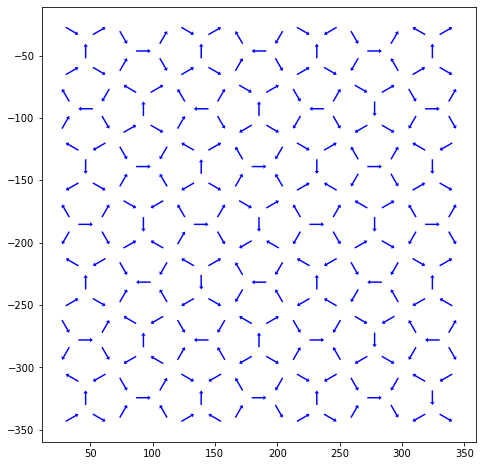

In [30]:
ureg = ice.ureg
sp = sup.spins()
sp = ice.spins(centers = centers, directions =directions, lattice_constant=19.5458*ureg.um )
sp.order_spins(ordering.random_ordering)


f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)
plt.axis('square')

In [31]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

In [32]:
a = 19.5458*ureg.um 

for s in sp:
    
    if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
        s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

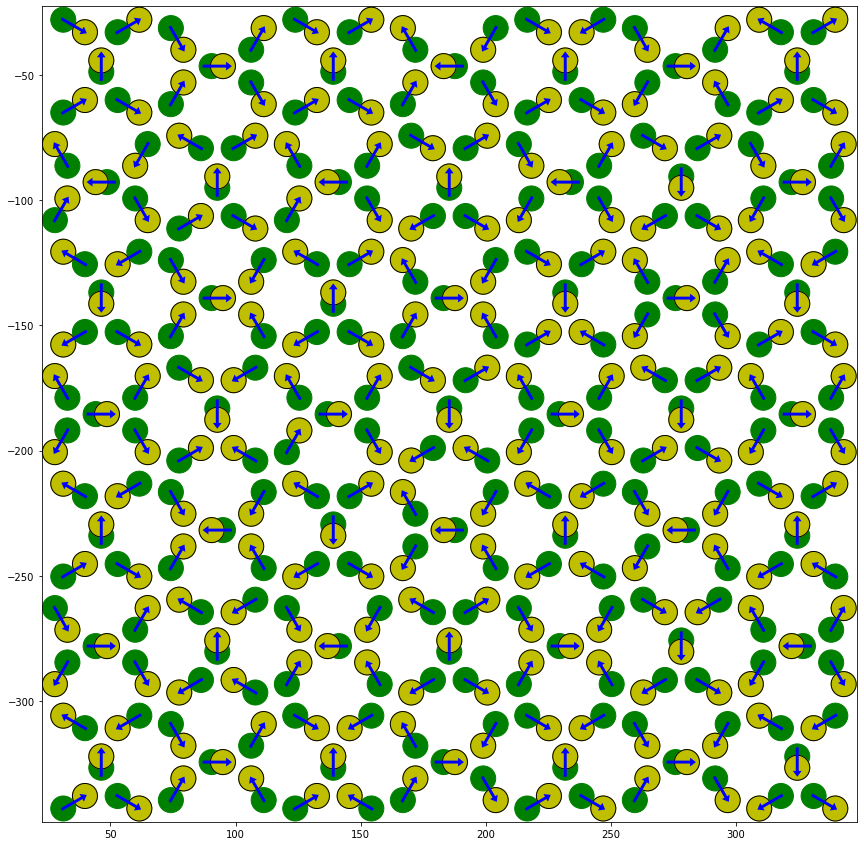

In [33]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(7.1539*ureg.um) # Parameter obtained by geometric restrictions.

f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)
sp.display(ax1)

In [34]:
world = ice.world(
    field = 30*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

total_time = 1000*ureg.s
col.simulate(world,
             name = 'test',
             #name = "MimicExperimentalData_CairoLattice_25mT-1000s_EXP30",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [35]:
col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [36]:
col.load_simulation(slice(0,None,1))

scanning file


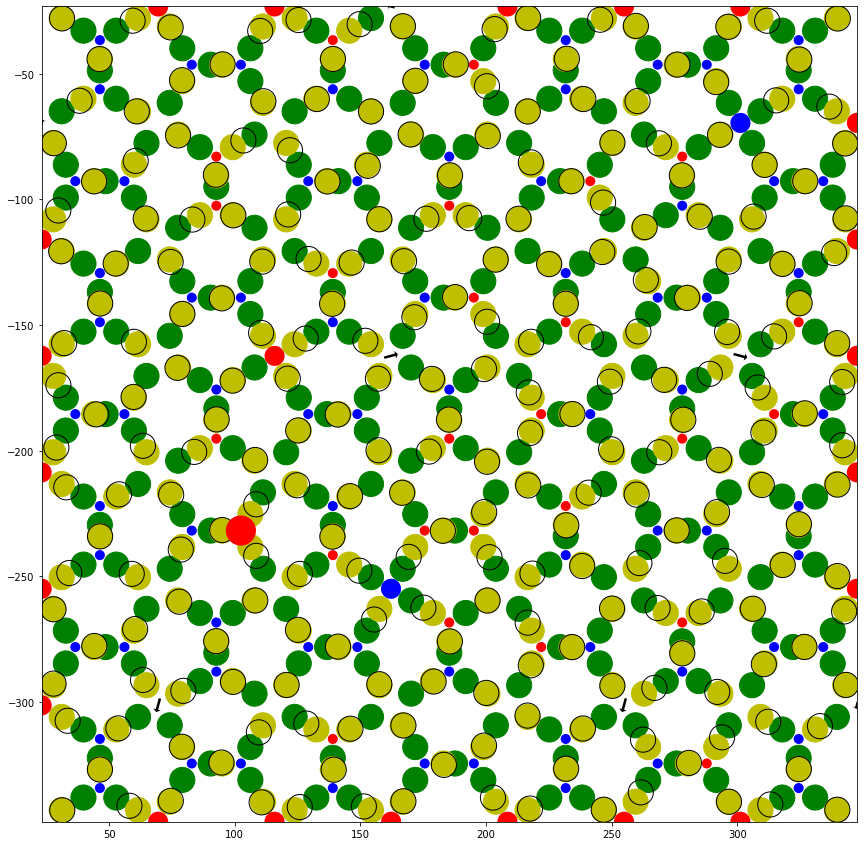

In [37]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

In [13]:
v.vertices

,x,y,coordination,charge,dx,dy
0,254.928788,-115.906484,2,2,1.366025,-0.366025
1,241.532806,-92.703963,3,1,1.000000,-1.732051
2,36.579081,0.000000,3,-1,-2.000000,0.000000
3,23.183099,-23.202521,2,2,-1.366025,-0.366025
4,231.759906,-36.579081,3,-1,1.732051,-1.000000
...,...,...,...,...,...,...
77,139.055944,-148.828844,3,1,-1.732051,-1.000000
78,254.928788,-162.205404,2,0,0.366025,-1.366025
79,23.183099,-115.906484,2,2,-1.366025,-0.366025
80,162.205404,-208.576807,2,2,-0.366025,-1.366025


# Loop

In [38]:
for i in range(0,20):
    
    centers, directions = sup.experimental_conf()
    
    ureg = ice.ureg
    sp = sup.spins()
    sp = ice.spins(centers = centers, directions = directions, lattice_constant=19.5458*ureg.um )
    sp.order_spins(ordering.random_ordering)
    
    particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

    trap_long = ice.trap(trap_sep = 10*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                   stiffness = 0.1*ureg.fN/ureg.nm)

    trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                   stiffness = 0.1*ureg.fN/ureg.nm)

    traps = []
    
    a = 19.5458*ureg.um 

    for s in sp:

        if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
            s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):

            traps.append(trap_short)

        else:

            traps.append(trap_long)
            
    col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

    col.pad_region(7.1539*ureg.um) # Parameter obtained by geometric restrictions.
    
    world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

    total_time = 1000*ureg.s
    col.simulate(world,
                 name = "MimicExperimentalData_CairoLattice_25mT-1000s_7x7_EXP"+str(i),
                 include_timestamp = False,
                 targetdir = output,
                 framerate = 1*ureg.Hz,
                 timestep = 10*ureg.ms,
                 run_time = total_time,
                 output = ["x","y","z","mux","muy","muz"])
    
    col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
    col.run_simulation()
    col.load_simulation(slice(0,None,1))

scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file
